In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [2]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [3]:
file = "latest_results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [19]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper', 'inductions_init', 'inductions_clean', 'max_ind_depth_clean']]

In [20]:
len(succeeded)

258

In [21]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
data.groupby('status').size()

status
ok                          258
parsing_other_exception     200
saturated                   292
viper_timeout              1422
dtype: int64

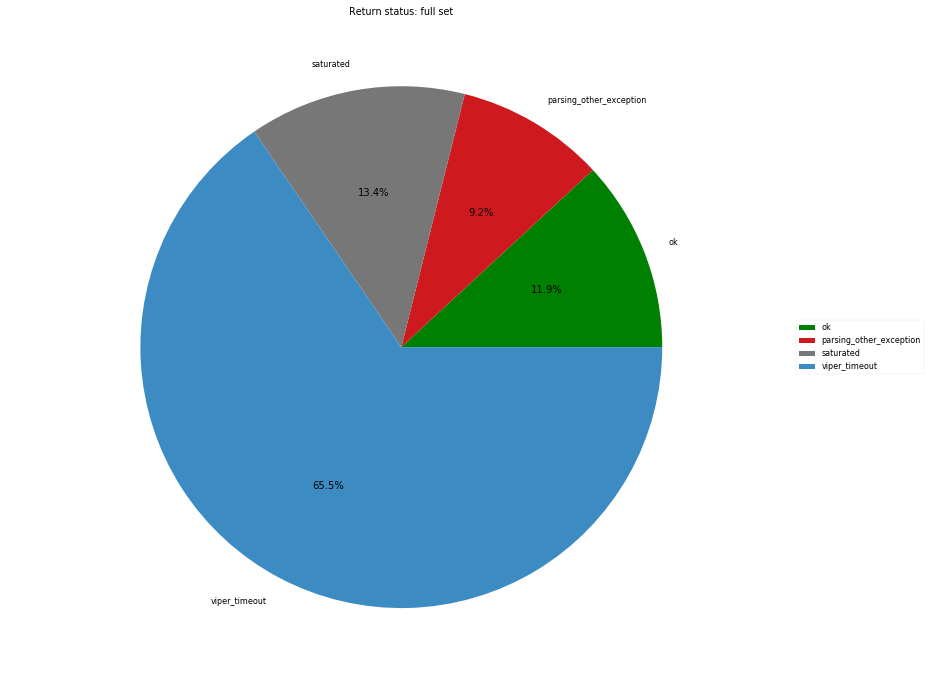

In [23]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

In [24]:
succeeded.groupby('mode').size()

mode
analytic_independent    67
analytic_sequential     99
spind                   68
treegrammar             24
dtype: int64

In [25]:
independent_success = succeeded[succeeded['mode'] == 'analytic_independent']
independent_files = set(independent_success.T.loc['file'])

In [26]:
sequential_success = succeeded[succeeded['mode'] == 'analytic_sequential']
sequential_files = set(sequential_success.T.loc['file'])

In [27]:
spind_success = succeeded[succeeded['mode'] == 'spind']
spind_files = set(spind_success.T.loc['file'])

In [28]:
independent_files - spind_files

{'isaplanner/prop_02.smt2',
 'isaplanner/prop_07.smt2',
 'isaplanner/prop_14.smt2',
 'isaplanner/prop_15.smt2',
 'isaplanner/prop_26.smt2',
 'isaplanner/prop_29.smt2',
 'isaplanner/prop_30.smt2',
 'isaplanner/prop_35.smt2',
 'isaplanner/prop_36.smt2',
 'isaplanner/prop_38.smt2',
 'isaplanner/prop_43.smt2',
 'tip2015/int_mul_comm.smt2',
 'tip2015/int_mul_ident_right.smt2',
 'tip2015/list_nat_elem.smt2',
 'tip2015/list_return_2.smt2',
 'tip2015/weird_nat_add3_assoc1.smt2',
 'tip2015/weird_nat_add3_spec.smt2'}

In [29]:
spind_files - independent_files

{'isaplanner/prop_01.smt2',
 'isaplanner/prop_05.smt2',
 'isaplanner/prop_09.smt2',
 'isaplanner/prop_19.smt2',
 'isaplanner/prop_23.smt2',
 'isaplanner/prop_32.smt2',
 'isaplanner/prop_55.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_79.smt2',
 'isaplanner/prop_80.smt2',
 'prod/prop_15.smt2',
 'tip2015/nat_alt_mul_comm.smt2',
 'tip2015/nat_alt_mul_same.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_lt_ne.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/regexp_RecEps.smt2'}

In [30]:
spind_files - sequential_files - independent_files

{'isaplanner/prop_57.smt2',
 'prod/prop_15.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/regexp_RecEps.smt2'}

In [36]:
pivot = succeeded.pivot_table( index=['file'], columns=['mode'] )
pivot

inductions_clean  \
mode                                          analytic_independent   
file                                                                 
false/productive_use_of_failure_app_inj1.smt2                  1.0   
isaplanner/prop_01.smt2                                        NaN   
isaplanner/prop_02.smt2                                        1.0   
isaplanner/prop_03.smt2                                        1.0   
isaplanner/prop_04.smt2                                        1.0   
isaplanner/prop_05.smt2                                        NaN   
isaplanner/prop_06.smt2                                        1.0   
isaplanner/prop_07.smt2                                        2.0   
isaplanner/prop_08.smt2                                        1.0   
isaplanner/prop_09.smt2                                        NaN   
isaplanner/prop_10.smt2                                        1.0   
isaplanner/prop_11.smt2                                        0.0   
isaplanner/prop_12.smt2                                        NaN   
isaplanner/prop_13.smt2                                        0.0   
isaplanner/prop_14.smt2                                        1.0   
isaplanner/prop_15.smt2                                        1.0   
isaplanner/prop_16.smt2                                        0.0   
isaplanner/prop_18.smt2                                        1.0   
isaplanner/prop_19.smt2                                        NaN   
isaplanner/prop_21.smt2                                        1.0   
isaplanner/prop_22.smt2                                        NaN   
isaplanner/prop_23.smt2                                        NaN   
isaplanner/prop_26.smt2                                        3.0   
isaplanner/prop_27.smt2                                        2.0   
isaplanner/prop_28.smt2                                        2.0   
isaplanner/prop_29.smt2                                        2.0   
isaplanner/prop_30.smt2                                        2.0   
isaplanner/prop_31.smt2                                        NaN   
isaplanner/prop_32.smt2                                        NaN   
isaplanner/prop_35.smt2                                        1.0   
isaplanner/prop_36.smt2                                        1.0   
isaplanner/prop_37.smt2                                        1.0   
isaplanner/prop_38.smt2                                        2.0   
isaplanner/prop_39.smt2                                        0.0   
isaplanner/prop_40.smt2                                        0.0   
isaplanner/prop_42.smt2                                        0.0   
isaplanner/prop_43.smt2                                        1.0   
isaplanner/prop_44.smt2                                        1.0   
isaplanner/prop_45.smt2                                        0.0   
isaplanner/prop_46.smt2                                        0.0   
isaplanner/prop_55.smt2                                        NaN   
isaplanner/prop_56.smt2                                        NaN   
isaplanner/prop_57.smt2                                        NaN   
isaplanner/prop_59.smt2                                        NaN   
isaplanner/prop_62.smt2                                        0.0   
isaplanner/prop_70.smt2                                        NaN   
isaplanner/prop_76.smt2                                        NaN   
isaplanner/prop_79.smt2                                        NaN   
isaplanner/prop_80.smt2                                        NaN   
prod/prop_02.smt2                                              NaN   
prod/prop_03.smt2                                              NaN   
prod/prop_15.smt2                                              NaN   
prod/prop_37.smt2                                              NaN   
prod/prop_38.smt2                                              NaN   
tip2015/bin_nat_plus_comm.smt2                              

In [32]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

                     mode                
inductions_clean     analytic_independent        55.0
                     analytic_sequential        157.0
                     spind                       60.0
                     treegrammar                  0.0
inductions_init      analytic_independent       110.0
                     analytic_sequential        192.0
                     spind                      286.0
                     treegrammar                  0.0
max_ind_depth_clean  analytic_independent        50.0
                     analytic_sequential        111.0
                     spind                       54.0
                     treegrammar                  0.0
time_viper           analytic_independent    428031.0
                     analytic_sequential     644432.0
                     spind                   419486.0
                     treegrammar             152372.0
dtype: float64

In [44]:
renamed = pivot.rename( index = str, columns = { 'analytic_sequential': 'as', 'analytic_independent': 'ai', 'treegrammar': 'tg' })
renamed

inductions_clean             \
mode                                                        ai   as spind   
file                                                                        
false/productive_use_of_failure_app_inj1.smt2              1.0  2.0   1.0   
isaplanner/prop_01.smt2                                    NaN  3.0   3.0   
isaplanner/prop_02.smt2                                    1.0  1.0   NaN   
isaplanner/prop_03.smt2                                    1.0  1.0   1.0   
isaplanner/prop_04.smt2                                    1.0  1.0   1.0   
isaplanner/prop_05.smt2                                    NaN  1.0   1.0   
isaplanner/prop_06.smt2                                    1.0  2.0   1.0   
isaplanner/prop_07.smt2                                    2.0  4.0   NaN   
isaplanner/prop_08.smt2                                    1.0  1.0   1.0   
isaplanner/prop_09.smt2                                    NaN  3.0   2.0   
isaplanner/prop_10.smt2                                    1.0  1.0   1.0   
isaplanner/prop_11.smt2                                    0.0  0.0   0.0   
isaplanner/prop_12.smt2                                    NaN  2.0   NaN   
isaplanner/prop_13.smt2                                    0.0  0.0   0.0   
isaplanner/prop_14.smt2                                    1.0  1.0   NaN   
isaplanner/prop_15.smt2                                    1.0  1.0   NaN   
isaplanner/prop_16.smt2                                    0.0  0.0   0.0   
isaplanner/prop_18.smt2                                    1.0  1.0   1.0   
isaplanner/prop_19.smt2                                    NaN  3.0   2.0   
isaplanner/prop_21.smt2                                    1.0  1.0   1.0   
isaplanner/prop_22.smt2                                    NaN  4.0   NaN   
isaplanner/prop_23.smt2                                    NaN  2.0   2.0   
isaplanner/prop_26.smt2                                    3.0  1.0   NaN   
isaplanner/prop_27.smt2                                    2.0  2.0   1.0   
isaplanner/prop_28.smt2                                    2.0  4.0   2.0   
isaplanner/prop_29.smt2                                    2.0  NaN   NaN   
isaplanner/prop_30.smt2                                    2.0  NaN   NaN   
isaplanner/prop_31.smt2                                    NaN  4.0   NaN   
isaplanner/prop_32.smt2                                    NaN  2.0   2.0   
isaplanner/prop_35.smt2                                    1.0  1.0   NaN   
isaplanner/prop_36.smt2                                    1.0  1.0   NaN   
isaplanner/prop_37.smt2                                    1.0  1.0   1.0   
isaplanner/prop_38.smt2                                    2.0  NaN   NaN   
isaplanner/prop_39.smt2                                    0.0  0.0   0.0   
isaplanner/prop_40.smt2                                    0.0  0.0   0.0   
isaplanner/prop_42.smt2                                    0.0  0.0   0.0   
isaplanner/prop_43.smt2                                    1.0  1.0   NaN   
isaplanner/prop_44.smt2                                    1.0  1.0   1.0   
isaplanner/prop_45.smt2                                    0.0  0.0   0.0   
isaplanner/prop_46.smt2                                    0.0  0.0   0.0   
isaplanner/prop_55.smt2                                    NaN  3.0   3.0   
isaplanner/prop_56.smt2                                    NaN  4.0   NaN   
isaplanner/prop_57.smt2                                    NaN  NaN   6.0   
isaplanner/prop_59.smt2                                    NaN  NaN   NaN   
isaplanner/prop_62.smt2                                    0.0  0.0   0.0   
isaplanner/prop_70.smt2                                    NaN  2.0   NaN   
isaplanner/prop_76.smt2                                    NaN  1.0   NaN   
isaplanner/prop_79.smt2                                    NaN  3.0   3.0   
isaplanner/prop_80.smt2                                    NaN  3.0   2.0   
prod/prop_02.smt2                         

In [45]:
print( renamed.to_html() )

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">inductions_clean</th>
      <th colspan="4" halign="left">inductions_init</th>
      <th colspan="4" halign="left">max_ind_depth_clean</th>
      <th colspan="4" halign="left">time_viper</th>
    </tr>
    <tr>
      <th>mode</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
    </tr>
    <tr>
      <th>file</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>false/productive